Forked from Vocal Emotion Sensing by alexmuhr - https://github.com/alexmuhr/Voice_Emotion

In [ ]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno


dataset_prefix = '/Users/b/Documents/voice project/datasets/'

In [51]:
#MFCC, look it up. Similar to Fourier mapping but more coarse grained.

In [2]:
# Need a function to remove dead space from audio files
# Checks a rolling average of signal over 1/10 sec and compares to threshold
# Returns a mask of True and False values that can be used to filter audio signals

def envelope(y, sr, threshold):
    mask = []
    y_abs = pd.Series(y).apply(np.abs)
    y_mean = y_abs.rolling(window = int(sr/10), min_periods = 1, center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return np.array(y[mask])

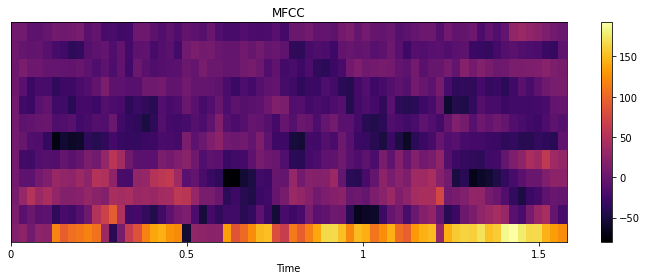

In [53]:
# Actor 1, male, very happy
filename = dataset_prefix + 'RAVDESS/Actor_01/03-01-03-02-01-01-01.wav'

y1, sr = librosa.load(filename)

y1 = envelope(y1, sr, 0.0005)

mfcc1 = librosa.feature.mfcc(y1,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc1[1:13], x_axis='time', cmap = 'inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [54]:
y1.shape[0]/sr

1.691655328798186

In [55]:
mfcc1.shape[1] * 1/40

1.7

In [56]:
IPython.display.Audio(y1, rate=sr)

Tempo: 123.046875BPM


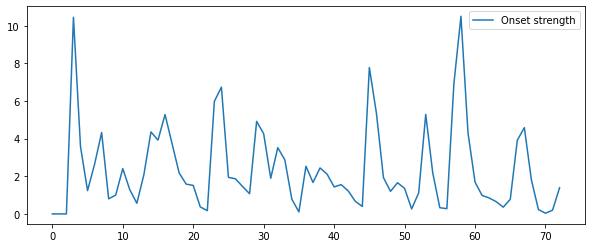

In [57]:
# Compute local onset autocorrelation
oenv1 = librosa.onset.onset_strength(y=y1, sr=sr)

# Estimate the global tempo for display purposes
tempo1 = librosa.beat.tempo(onset_envelope=oenv1, sr=sr)[0]

print("Tempo: " + str(tempo1) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv1, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


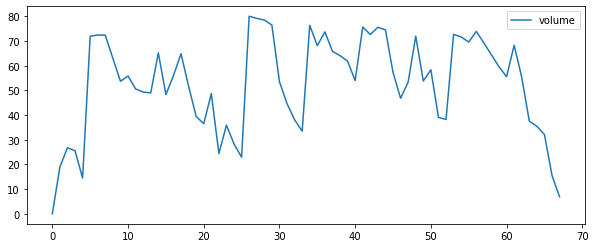

In [58]:
# Determine volume per frame
# Volume is a rather tricky metric due to how humans perceive sound
# This code computes the power spectrogram, sums the power components, then converts the power to db scale
# This should be a fairly realistic representation version of volume

S = librosa.stft(y1, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness1 = librosa.power_to_db(p_sum)
n_frames1 = loudness1.shape[1]

loudness1 = loudness1 - loudness1.min()

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames1), loudness1.reshape(n_frames1,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

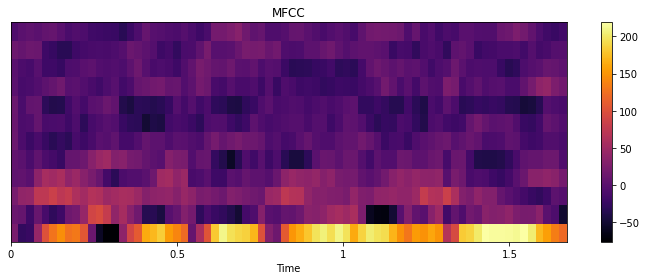

In [59]:
# Actor 1, male, very sad
filename = dataset_prefix + 'RAVDESS/Actor_01/03-01-04-02-01-01-01.wav'

y2, sr = librosa.load(filename)

y2 = envelope(y2, sr, 0.0005)

mfcc2 = librosa.feature.mfcc(y2,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc2[1:13], x_axis='time', cmap = 'inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [60]:
IPython.display.Audio(y2, rate=sr)

Tempo: 103.359375BPM


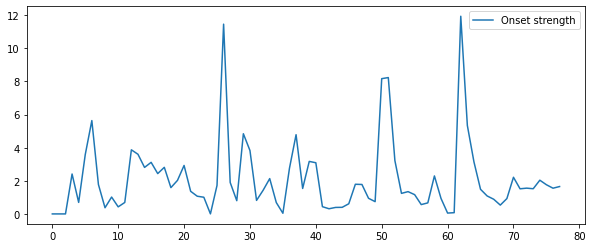

In [61]:
# Compute local onset autocorrelation
oenv2 = librosa.onset.onset_strength(y=y2, sr=sr)

# Estimate the global tempo for display purposes
tempo2 = librosa.beat.tempo(onset_envelope=oenv2, sr=sr)[0]

print("Tempo: " + str(tempo2) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv2, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


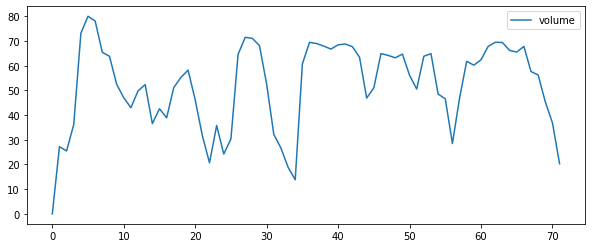

In [62]:
S = librosa.stft(y2, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness2 = librosa.power_to_db(p_sum)
n_frames2 = loudness2.shape[1]

loudness2 = loudness2 - loudness2.min() 

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames2), loudness2.reshape(n_frames2,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

In [63]:
# MFCCs don't look too different between happy vs sad. Tempo is significantly different here. Much slower for sad!

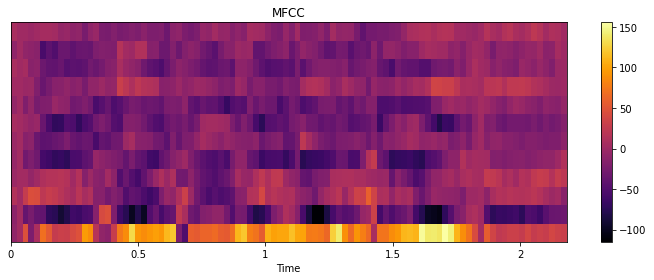

In [64]:
# Actress 10, female, very happy
filename = dataset_prefix + 'RAVDESS/Actor_10/03-01-03-02-01-01-10.wav'

y3, sr = librosa.load(filename)

y3 = envelope(y3, sr, 0.0005)

mfcc3 = librosa.feature.mfcc(y3,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc3[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [65]:
IPython.display.Audio(y3, rate=sr)

Tempo: 123.046875BPM


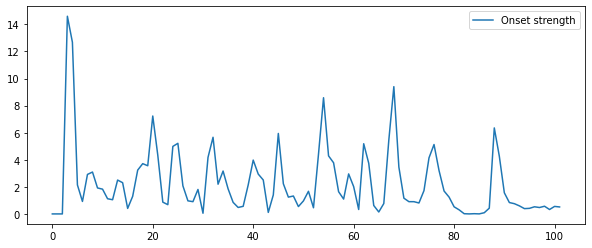

In [66]:
# Compute local onset autocorrelation
oenv3 = librosa.onset.onset_strength(y=y3, sr=sr)

# Estimate the global tempo for display purposes
tempo3 = librosa.beat.tempo(onset_envelope=oenv3, sr=sr)[0]

print("Tempo: " + str(tempo3) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv3, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


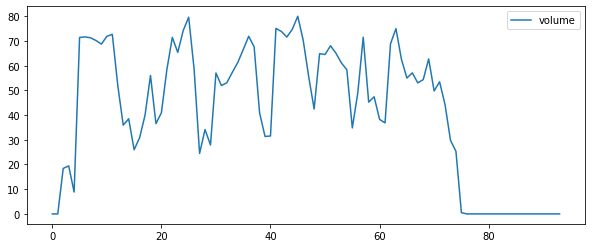

In [67]:
S = librosa.stft(y3, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness3 = librosa.power_to_db(p_sum)
n_frames3 = loudness3.shape[1]

loudness3 = loudness3 - loudness3.min()

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames3), loudness3.reshape(n_frames3,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

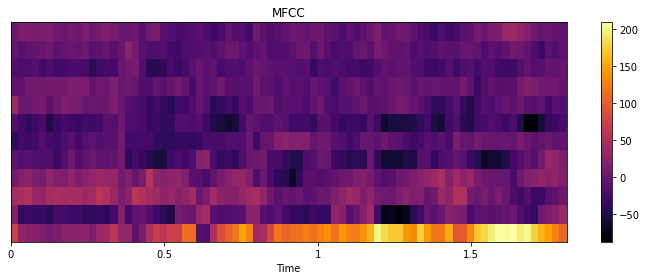

In [68]:
# Actress 10, female, very sad
filename = dataset_prefix + 'RAVDESS/Actor_10/03-01-04-02-01-01-10.wav'

y4, sr = librosa.load(filename)

y4 = envelope(y4, sr, 0.0005)

mfcc4 = librosa.feature.mfcc(y4,sr,n_mfcc = 26, n_fft = 552, hop_length = 552)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc4[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

In [69]:
IPython.display.Audio(y4, rate=sr)

Tempo: 135.99917763157896BPM


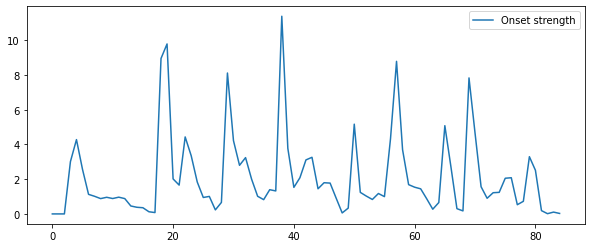

In [70]:
# Compute local onset autocorrelation
oenv4 = librosa.onset.onset_strength(y=y4, sr=sr)

# Estimate the global tempo for display purposes
tempo4 = librosa.beat.tempo(onset_envelope=oenv4, sr=sr)[0]

print("Tempo: " + str(tempo4) + "BPM")

plt.figure(figsize=(10, 4))
plt.plot(oenv4, label='Onset strength')
plt.legend(frameon=True)
plt.axis('tight');

In [71]:
# MFCCs are fairly different for this female actor. Tempo is different too but faster in this case for the sad.

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


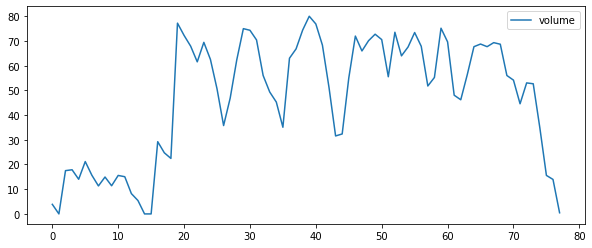

In [72]:
S = librosa.stft(y4, n_fft = 552, hop_length = 552)**2
power = np.abs(S)**2
p_sum = np.sum(power, axis=0, keepdims=True)
loudness4 = librosa.power_to_db(p_sum)
n_frames4 = loudness4.shape[1]

loudness4 = loudness4 - loudness4.min()

plt.figure(figsize=(10, 4))
sns.lineplot(range(n_frames4), loudness4.reshape(n_frames4,), label = 'volume')
plt.legend(frameon=True)
plt.axis('tight');

In [73]:
# Overlay volume and oenv of happy and sad recordings

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


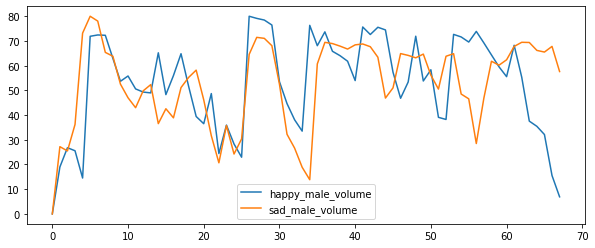

In [74]:
min_frames = min(n_frames1, n_frames2)
happy_vol = loudness1[0,0:min_frames]
sad_vol = loudness2[0,0:min_frames]

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), happy_vol.reshape(min_frames,), label = 'happy_male_volume')
sns.lineplot(range(min_frames), sad_vol.reshape(min_frames,), label = 'sad_male_volume')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


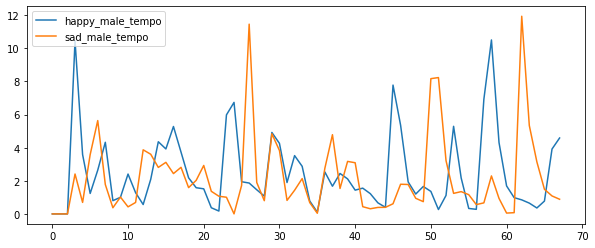

In [75]:
plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), oenv1[0:min_frames], label = 'happy_male_tempo')
sns.lineplot(range(min_frames), oenv2[0:min_frames], label = 'sad_male_tempo')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


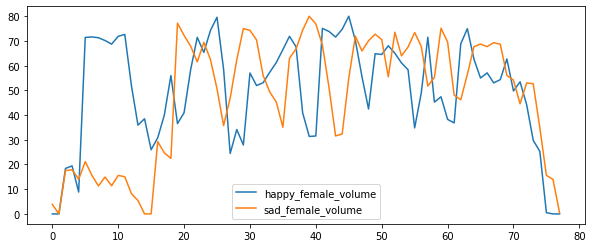

In [76]:
min_frames = min(n_frames3, n_frames4)
happy_vol = loudness3[0,0:min_frames]
sad_vol = loudness4[0,0:min_frames]

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), happy_vol.reshape(min_frames,), label = 'happy_female_volume')
sns.lineplot(range(min_frames), sad_vol.reshape(min_frames,), label = 'sad_female_volume')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


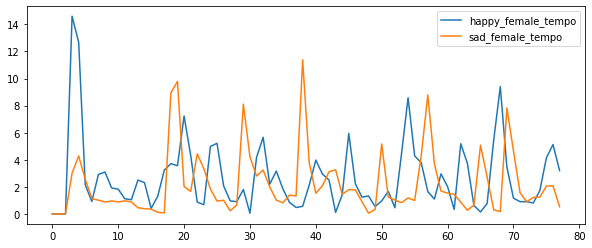

In [77]:
plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), oenv3[0:min_frames], label = 'happy_female_tempo')
sns.lineplot(range(min_frames), oenv4[0:min_frames], label = 'sad_female_tempo')
plt.legend(frameon=True)
plt.axis('tight');

In [78]:
# Lets look at deltas for our volume and MFCC features

In [79]:
deltas1 = librosa.feature.delta(loudness1)
deltas2 = librosa.feature.delta(loudness2)
deltas3 = librosa.feature.delta(loudness3)
deltas4 = librosa.feature.delta(loudness4)

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


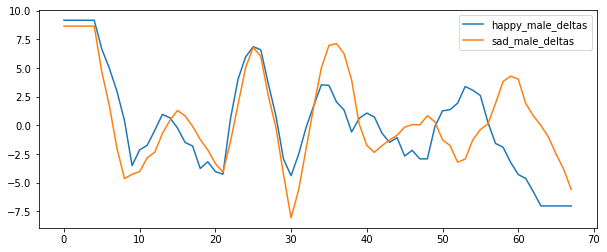

In [80]:
min_frames = min(n_frames1, n_frames2)

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), deltas1[0][0:min_frames], label = 'happy_male_deltas')
sns.lineplot(range(min_frames), deltas2[0][0:min_frames], label = 'sad_male_deltas')
plt.legend(frameon=True)
plt.axis('tight');

/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/b/.conda/envs/Voice_Emotion-master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


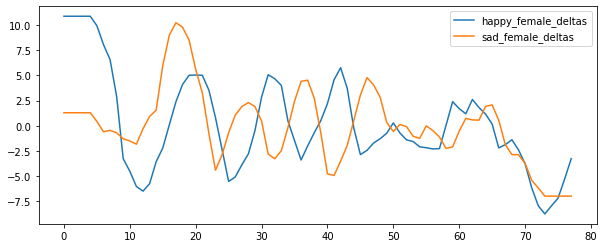

In [81]:
min_frames = min(n_frames3, n_frames4)

plt.figure(figsize=(10, 4))
sns.lineplot(range(min_frames), deltas3[0][0:min_frames], label = 'happy_female_deltas')
sns.lineplot(range(min_frames), deltas4[0][0:min_frames], label = 'sad_female_deltas')
plt.legend(frameon=True)
plt.axis('tight');

In [82]:
mfcc_deltas1 = librosa.feature.delta(mfcc1)
mfcc_deltas2 = librosa.feature.delta(mfcc2)
mfcc_deltas3 = librosa.feature.delta(mfcc3)
mfcc_deltas4 = librosa.feature.delta(mfcc4)

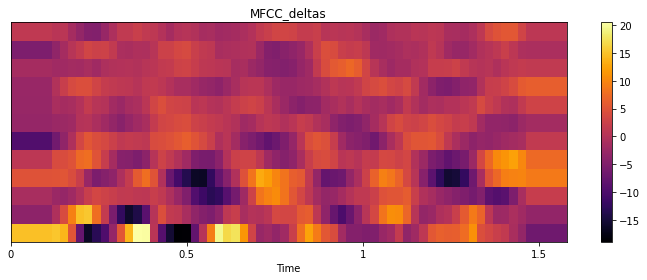

In [83]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas1[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

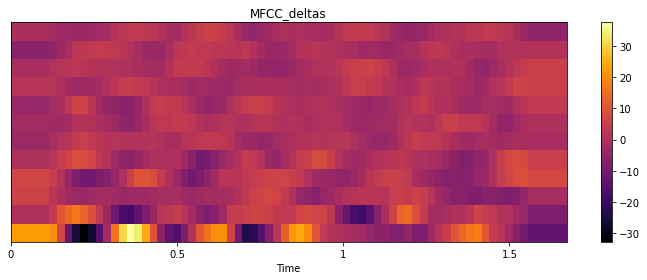

In [84]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas2[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

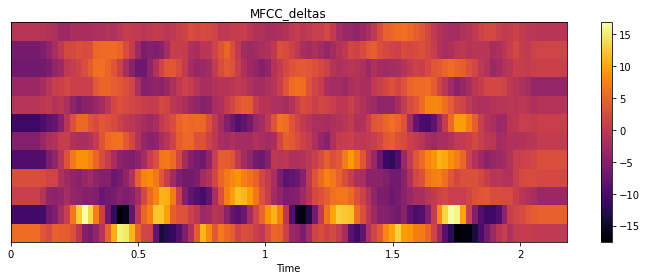

In [85]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas3[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

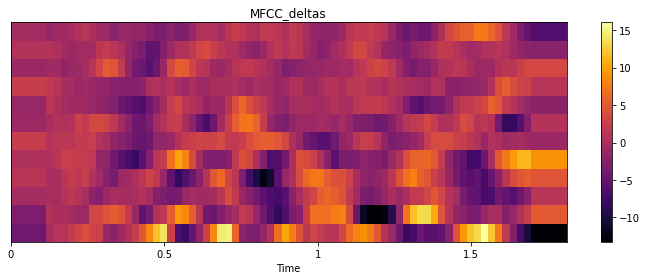

In [86]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_deltas4[1:13], x_axis='time', cmap='inferno')
plt.colorbar()
plt.title('MFCC_deltas')
plt.tight_layout()
plt.show();

In [5]:
# Now write a script to pull out audio files, clean them, then save them to clean

import glob

ravdess_file_list = glob.glob(dataset_prefix + 'RAVDESS/*/*.wav')

In [3]:
def clean_files(file_list):

    count = 0

    for file in file_list:
        y, sr = librosa.load(file)
        y = envelope(y, sr, 0.0005)
        save_file = 'clean/' + file
        #print(f'save_file: {save_file}')
        if not os.path.exists(os.path.dirname(save_file)):
            try:
                os.makedirs(os.path.dirname(save_file))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
        
        with open(save_file, 'w') as new_file:
            sf.write(save_file, y, sr)
            new_file.close()
            
        count += 1
        if count % 100 == 0:
            print('cleaned and saved 100 files')
    
    print("cleaning complete!")

In [89]:
# clean_files(ravdess_file_list)

In [6]:
tess_file_list = glob.glob('TESS/*.wav')

clean_files(tess_file_list)

cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaning complete!


In [91]:
savee_file_list = glob.glob(dataset_prefix + 'SAVEE/Data/AudioData/*/*.wav')

# clean_files(savee_file_list)

In [92]:
# Now that all of the files have been cleaned lets create a simple csv with filenames and basic features

In [11]:
ravdess_clean_list = glob.glob('clean/RAVDESS/*/*.wav')

In [12]:
# Define function for building the RAVDESS index

def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    intensity_key = {'01': 'normal', '02': 'strong'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'intensity': [], 'statement': [], 'repеtition': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('RAVDESS')
        
        df['filename'].append(file)

        props = file.split('/')[3].split('.')[0].split('-')
        df['actor'].append(props[6])
        df['emotion'].append(emotion_key[props[2]])
        df['intensity'].append(intensity_key[props[3]])
        df['statement'].append(props[4])
        df['repеtition'].append(props[5])

        if int(props[6]) % 2 == 0:
            df['gender'].append('female')
        else:
            df['gender'].append('male')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [13]:
ravdess_index = build_ravdess_index(ravdess_clean_list)

In [14]:
# RAVDESS classes are balanced except for neutral

ravdess_index['emotion'].value_counts()

angry        192
fearful      192
disgusted    192
sad          192
surprised    192
happy        192
calm         192
neutral       96
Name: emotion, dtype: int64

In [15]:
savee_clean_list = glob.glob('clean/SAVEE/Data/AudioData/*/*.wav')

In [16]:
savee_clean_list[0].split('/')[5][-6:-4]

'17'

In [17]:
# Define function for building the SAVEE index

def build_savee_index(file_list):
    
    emotion_key = {'n': 'neutral', 'h': 'happy', 'sa': 'sad', 'a': 'angry', 'f': 'fearful', 'd': 'disgusted', 'su': 'surprised'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'repеtition': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('SAVEE')
        
        df['filename'].append(file)

        props = file.split('/')
        print(f'file: {file}')
        print(f'props: {props}')
        df['actor'].append(props[4])
        df['emotion'].append(emotion_key[props[5][:-6]])
        df['repеtition'].append(props[5][-6:-4])
        df['gender'].append('male')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [18]:
savee_index = build_savee_index(savee_clean_list)

file: clean/SAVEE/Data/AudioData/KL/n17.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'n17.wav']
file: clean/SAVEE/Data/AudioData/KL/n03.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'n03.wav']
file: clean/SAVEE/Data/AudioData/KL/h05.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'h05.wav']
file: clean/SAVEE/Data/AudioData/KL/sa04.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'sa04.wav']
file: clean/SAVEE/Data/AudioData/KL/h11.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'h11.wav']
file: clean/SAVEE/Data/AudioData/KL/sa10.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'sa10.wav']
file: clean/SAVEE/Data/AudioData/KL/d08.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'd08.wav']
file: clean/SAVEE/Data/AudioData/KL/d09.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'd09.wav']
file: clean/SAVEE/Data/AudioData/KL/sa11.wav
props: ['clean', 'SAVEE', 'Data', 'AudioData', 'KL', 'sa11.wav']
file: clean/SAVEE/Data

In [19]:
# This dataset is reasonably balanced. Appears that I'm missing some of the files from one actor, should be fine though.

savee_index['emotion'].value_counts()

neutral      120
happy         60
sad           60
disgusted     60
fearful       60
surprised     60
angry         60
Name: emotion, dtype: int64

In [7]:
tess_clean_list = glob.glob('clean/TESS/*.wav')

In [8]:
# Define function for building the TESS index

def build_tess_index(file_list):
    
    emotion_key = {'neutral': 'neutral', 'happy': 'happy', 'sad': 'sad', 'angry': 'angry',
                   'fear': 'fearful', 'disgust': 'disgusted', 'ps': 'surprised'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'statement': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('TESS')
        
        df['filename'].append(file)
        
        props = file.split('/')[2].split('_')
        print(f'tess props: {props}')
        df['actor'].append(props[0])
        df['emotion'].append(emotion_key[props[2][:-4]])
        df['statement'].append(props[1])
        df['gender'].append('female')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [9]:
tess_index = build_tess_index(tess_clean_list)

tess props: ['YAF', 'wire', 'happy.wav']
tess props: ['OAF', 'fat', 'disgust.wav']
tess props: ['OAF', 'bought', 'happy.wav']
tess props: ['OAF', 'fit', 'neutral.wav']
tess props: ['YAF', 'dead', 'fear.wav']
tess props: ['OAF', 'join', 'neutral.wav']
tess props: ['YAF', 'hall', 'happy.wav']
tess props: ['YAF', 'hurl', 'neutral.wav']
tess props: ['OAF', 'king', 'angry.wav']
tess props: ['OAF', 'rot', 'angry.wav']
tess props: ['YAF', 'hit', 'ps.wav']
tess props: ['OAF', 'gaze', 'sad.wav']
tess props: ['YAF', 'ripe', 'fear.wav']
tess props: ['YAF', 'dog', 'neutral.wav']
tess props: ['OAF', 'hire', 'angry.wav']
tess props: ['OAF', 'neat', 'sad.wav']
tess props: ['YAF', 'gin', 'happy.wav']
tess props: ['YAF', 'sub', 'neutral.wav']
tess props: ['OAF', 'mouse', 'sad.wav']
tess props: ['OAF', 'ripe', 'disgust.wav']
tess props: ['YAF', 'date', 'disgust.wav']
tess props: ['YAF', 'hall', 'fear.wav']
tess props: ['OAF', 'voice', 'disgust.wav']
tess props: ['YAF', 'laud', 'neutral.wav']
tess props:

In [10]:
# Perfectly balanced!

tess_index['emotion'].value_counts()

happy        400
disgusted    400
neutral      400
fearful      400
angry        400
surprised    400
sad          400
Name: emotion, dtype: int64

In [22]:
# Save each index to a csv file
outdir = './bm'
if not os.path.exists(outdir):
    os.mkdir(outdir)


ravdess_index.to_csv(os.path.join(outdir, 'ravdess_index.csv'))
savee_index.to_csv(os.path.join(outdir, 'savee_index.csv'))
tess_index.to_csv(os.path.join(outdir, 'tess_index.csv'))

In [23]:
# Now combine all the dataset indexes into one using their common columns

common_cols = ['dataset', 'filename', 'actor', 'emotion', 'length', 'gender']

complete_index = pd.concat([ravdess_index[common_cols], savee_index[common_cols], tess_index[common_cols]], axis = 0)
complete_index.reset_index(drop = True, inplace = True)

In [24]:
# This is a reasonably balanced dataset except for the emotion 'calm'
# Drop emotion 'calm' from dataset. Is 'calm' even an emotion anyway?

complete_index['emotion'].value_counts()

angry        652
fearful      652
disgusted    652
sad          652
surprised    652
happy        652
neutral      616
calm         192
Name: emotion, dtype: int64

In [25]:
complete_index.shape

(4720, 6)

In [26]:
complete_index = complete_index.drop(list(complete_index[complete_index['emotion'] == 'calm'].index), axis = 0).reset_index(drop = True)

In [27]:
# classes are now much better balanced.

complete_index['emotion'].value_counts()

angry        652
fearful      652
disgusted    652
sad          652
surprised    652
happy        652
neutral      616
Name: emotion, dtype: int64

In [28]:
# Lets split our dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

In [ ]:
# To make things simple later I'll just add a column to file_properties that says whether a point is or isn't in test set

In [29]:
# For now I'm not going to worry about using a validation set.
# Later if I want to more finely tune my hyper parameters I just need to uncomment some lines to also get a validation set.

def assign_sets(complete_index):
    train, test = train_test_split(complete_index, test_size = 0.2, random_state = 42)
    #validation, test = train_test_split(_test, test_size = 0.5, random_state = 42)
    
    set_list = []
    
    for file in complete_index['filename']:
        if file in list(train['filename']):
            set_list.append('train')
#         if file in list(validation['filename']):
#             set_list.append('validation')
        if file in list(test['filename']):
            set_list.append('test')
    
    complete_index['set'] = set_list
    
    return complete_index        

In [30]:
complete_index = assign_sets(complete_index)

In [31]:
complete_index[complete_index['set'] == 'train']['emotion'].value_counts()

disgusted    532
angry        530
sad          523
surprised    522
happy        517
neutral      504
fearful      494
Name: emotion, dtype: int64

In [32]:
complete_index[complete_index['set'] == 'train'].shape

(3622, 7)

In [ ]:
# complete_index[complete_index['set'] == 'validation']['emotion'].value_counts()

In [ ]:
# complete_index[complete_index['set'] == 'validation'].shape

In [33]:
complete_index[complete_index['set'] == 'test']['emotion'].value_counts()

fearful      158
happy        135
surprised    130
sad          129
angry        122
disgusted    120
neutral      112
Name: emotion, dtype: int64

In [34]:
complete_index[complete_index['set'] == 'test'].shape

(906, 7)

In [35]:
complete_index.to_csv(os.path.join(outdir, 'complete_index.csv'))